# Applied Data Science Capstone 
## Assignment 2: Segmenting and Clustering Neighborhoods in Toronto - Part 2

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

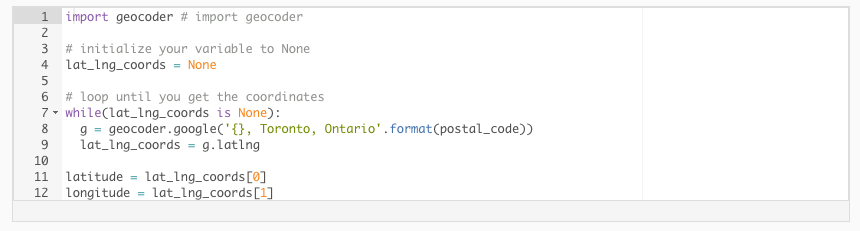

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

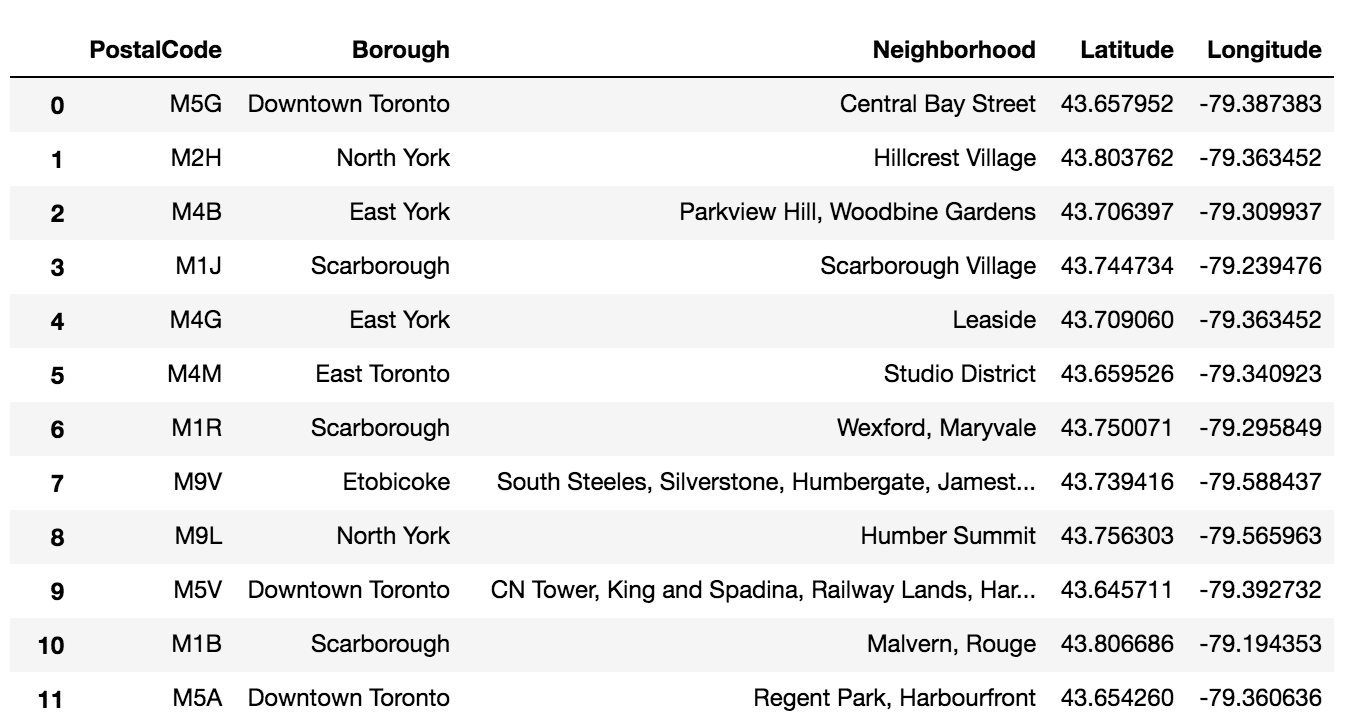![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/HZ3jNHNOEeiMwApe4i-fLg_f44f0f10ccfaf42fcbdba9813364e173_Screen-Shot-2018-06-18-at-7.18.16-PM.png?expiry=1555718400000&hmac=p3isop4LHOw_CMXIO0wZm4KFOACAt4FXI6kp-1gH2lw)

### Extracting the Latitude and Longitude of Canada Ontario

### Using the CSV file given in the link.

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

link = "http://cocl.us/Geospatial_data"
df_new = pd.read_csv(link)

df_new.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [2]:
df_new.shape

(103, 3)

Both the data frames have 103 rows and 3 columns

#### Changing the column name Postal code to Postcode to merge the two data frames together

In [3]:
df_new.columns = ['Postcode','Latitude','Longitude']

cols = df_new.columns.tolist()
cols

['Postcode', 'Latitude', 'Longitude']

#### Read in the CSV file saved in the previous assignment

In [4]:
df_old = pd.read_csv('df_can.csv',index_col=0)
df_old.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### Merging the two data frames together based on their Postcode

In [5]:
df_final = pd.merge(df_old, df_new, on='Postcode')
df_final.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### Save the file as a csv

In [6]:
df_final.to_csv(r'df_final.csv')